#### Assignment 1  - Shicheng Chen (E0534721)
This answer sheet contains your answer to questions in Section 1~4. Sentences in <span style="color:blue">blue</span> indicates questions to be answered. 

For open questions, please organize your answer into "points" to ease our grading efforts. For example, an answer to "What is the most popular item? Explain you answer and describe any assumptions you’ve made." should look like:

> The most popular item ID is 12345. The reason is that:
> - reason 1
> - reason 2
> 
> I've made the following assumptions:
> - assumption 1
> - assumption 2

If you wish to type math equations in markdown, follow this link: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

Remember to save this Jupyter notebook as __YourNameInLumiNUS_YourNUSNETID.ipynb__.

**Import all libraries and load data here**

In [14]:
# This is a code cell
# -- Import all libraries and load data in this cell --
from sklearn.cluster import KMeans
import numpy as np
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import tqdm,itertools
from itertools import permutations
from efficient_apriori import apriori

In [15]:
X = np.array([[-5, 1], [0, 1], [5, 1],[-5, 0], [0, 0], [5, 0],[-5, -1], [0, -1], [5, -1]])
kmeans = KMeans(n_clusters=3, init=np.array([[0,1],[0,0],[0,-1]])).fit(X)
kmeans.labels_,kmeans.cluster_centers_

/home/csc/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


(array([0, 0, 0, 1, 1, 1, 2, 2, 2], dtype=int32), array([[ 0.,  1.],
        [ 0.,  0.],
        [ 0., -1.]]))

In [18]:
#KMeans?

In [19]:
X = np.array([[-5, 1], [0, 1], [5, 1],[-5, 0], [0, 0], [5, 0],[-5, -1], [0, -1], [5, -1]])
kmeans = KMeans(n_clusters=3, init=np.array([[-5,1],[5,-1],[0,0]]),n_init=1,max_iter=2).fit(X)
kmeans.labels_,kmeans.cluster_centers_

(array([0, 2, 1, 0, 2, 1, 0, 2, 1], dtype=int32), array([[-5.,  0.],
        [ 5.,  0.],
        [ 0.,  0.]]))

### Section 1 - Clustering and Initialization (20 points)

<span style="color:blue"> Consider the nine data points (A, B, C, D, E, F, G, H, I) in Fig. 1. Taking the points D, E, and F as the initial cluster centers, apply the K-Means algorithm on the data, with the number of clusters K = 3. At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster. Do you think this clustering result is satisfactory? </span>

- Cluster_1 includes A,D,G and the center of cluster_1 is (0,1)
- Cluster_2 includes B,E,H and the center of cluster_1 is (0,0)
- Cluster_3 includes C,F,I and the center of cluster_1 is (0,-1)

- I am not satisfied with the results. I perfer that points A,B,C, points D,E,F, and points G,H,I belong to the first, second and third cluster respectively.

<span style="color:blue"> Initialization is important for K-means. Consider the following heuristic method for selecting the initial cluster center positions: <br><br>
Choose the first center $c_1$ as the point A.<br>
For $k=2,...,K$, set $c_k = \underset{x\in X}{\arg\max}(\underset{i=1,...,k-1}{\min}\Vert x - c_i \Vert_2)$, where X is the set of data points.<br><br>
Apply this heuristic to the data points in Fig. 1. Show the computed cluster centers for K = 3. Next, run the K-means algorithm with the obtained cluster centers. At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster.
</span>

- init:
    - Cluster_1 includes A,B,C and the center of cluster_1 is (-5,1)
    - Cluster_2 includes G,H,I and the center of cluster_1 is (5,-1)
    - Cluster_3 includes D,E,F and the center of cluster_1 is (0,0)
- iteration>=1:
    - Cluster_1 includes A,B,C and the center of cluster_1 is (-5,0)
    - Cluster_2 includes G,H,I and the center of cluster_1 is (5,0)
    - Cluster_3 includes D,E,F and the center of cluster_1 is (0,0)

### Section 2 - Selecting the Number of Clusters (10 points)

<span style="color:blue"> Here, we will explore how to select the number of clusters. Using Python 3.6, load the attached data file 'assignment1.data' using the following commands:</span>
    
<span style="color:blue">import joblib<br>X = joblib.load('assignment1.data')</span>

<span style="color:blue">This results in X, which is a 400 by 2 matrix, where each row is a single sample, in 2 dimensions. Apply K-means on these samples with K ranging from 1 to 10. Plot a figure, where the y-axis is the Within Cluster Sum of Squares (WCSS) after convergence, and the x-axis is K from 1 to 10: </span>

<span style="color:blue">$WCSS = \sum_{k=1}^K \sum_{x \in C_i} \Vert x - c_i \Vert_2^2$</span>

<span style="color:blue">Select a value of K that you think is appropriate for clustering this dataset, and explain the reason. </span>

([<matplotlib.lines.Line2D at 0x14c8c158f208>],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [22800.675548638057,
  10437.716090329679,
  3937.5280395580567,
  517.8860917080183,
  463.46247191716486,
  414.55682439373464,
  372.5963875002999,
  323.82556564047775,
  298.121337527137,
  267.3763242355651])

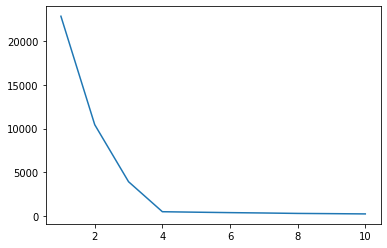

In [20]:
x = joblib.load('assignment1.data')
x.shape

a,b=[],[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x)
    s=0
    for i in range(k):
        idx=np.arange(x.shape[0])[i==kmeans.labels_]
        s+=np.sum((x[idx]-kmeans.cluster_centers_[i:i+1])**2)
    a.append(k)
    b.append(s)
plt.plot(a,b),a,b

In [21]:
# This is a code cell
# -- Your code for running clustering and plotting the figure goes here.

This is a markdown cell. Replace this cell with your answer about the value of K, and the explanation.
- When k is less than 4, the costs are very high.
- When k is more than 4, the costs reduce slightly since bigger k tends have less cost. The reduction of costs is not because of finding new clusters.
- I would like to set K=4 since it has reasonable costs and enough clusters.

### Section 3 - Data Cleaning and Exploration (20 points)

<span style="color:blue"> 1) Before continuing, let us examine the dataset for “dirty” records to do some data cleaning. Remove the records with negative values of the Quantity variable, and the records with NaN values of the CustomerID variable. Report how many records were removed in total. </span>

This is a markdown cell. Replace this cell with your answer about "dirty" records. 
- I removed 143985 rows

In [22]:
df=pd.read_csv("record.csv")
df['Quantity']=df['Quantity'].astype(int)
print(len(df[(df.Quantity<0)]),len(df[df.CustomerID.isnull()]))
print('all removed',len(df[(df.Quantity<0) | (df.CustomerID.isnull())]))

10624 135080
all removed 143985


In [23]:
# This is a code cell
# -- Your code for removing dirty records goes here --

<span style="color:blue"> 2)~9) Please provide the answers to the questions listed in the table. </span>

In [24]:
df=pd.read_csv("record.csv")
df=df[(df.Quantity>=0) & (df.CustomerID.notnull())]
len(df)

397924

In [25]:
df.sort_values(by='InvoiceDate').iloc[0]['InvoiceDate']

'2010-12-01 08:26:00'

In [26]:
df.sort_values(by='InvoiceDate').iloc[-1]['InvoiceDate']

'2011-12-09 12:50:00'

In [27]:
#np.sort(np.unique(df['CustomerID'].values))[:40]

In [28]:
len(np.unique(df['CustomerID'].values)),df['CustomerID'].nunique()

(4339, 4339)

In [29]:
df['InvoiceNo'].nunique()

18536

In [30]:
df['StockCode'].nunique(),df['Description'].nunique()

(3665, 3877)

In [31]:
df[df['CustomerID']==17850]['InvoiceNo'].nunique()

34

In [32]:
c2n=df.groupby('CustomerID')['InvoiceNo'].nunique()
c2n[c2n==c2n.max()]

CustomerID
12748.0    210
Name: InvoiceNo, dtype: int64

In [33]:
s2n=df.groupby('StockCode')['Quantity'].sum()
s2n[s2n==s2n.max()]

StockCode
23843    80995
Name: Quantity, dtype: int64

In [34]:
df.StockCode.nunique()

3665

In [35]:
s2n['23843'],s2n['85123A']

(80995, 36782)

In [36]:
# This is a code cell
# -- (Optional) Your code for filling in the table goes here. --

This is a markdown cell. Please fill in your answer for (2)~(9).

| No. | Question                                                                                                   | Answer       |
|-----|------------------------------------------------------------------------------------------------------------|--------------|
| 2)  | Starting date of the dataset?                                                                              | 2010-12-01 |
| 3)  | Ending date of the dataset?                                                                                | 2011-12-09 |
| 4)  | Number of customers?                                                                                       | 4339 |
| 5)  | Number of transactions?                                                                                    | 18536 |
| 6)  | Number of different kind of items?                                                                         | 3665 |
| 7)  | Number of transactions customer ID 17850 has made?                                                         | 34 |
| 8)  | Which customer (ID) has made the most transactions?                                                        | 12748 |
| 9)  | What is the item ID (i.e. StockCode) of the best-seller? We define "best-seller" as the item with the highest sales volume. | 23843 |

<span style="color:blue"> 10) Next, let us get some general understanding about the transactions. Please make a histogram of the number of unique items per transaction (as described below) and describe one insight that you can observe from the plot.  
(Note: You can plot this histogram by running matplotlib.hist() with 200 bins on the sequence of values $n_1, …, n_N$, where $n_i$ is the number of unique items in transaction $i$. This produces a histogram with “number of unique items in transaction” in the x-axis, and “count” in the y-axis, i.e. each bar counts how many transactions fall into the corresponding bucket. It is sufficient to comment on the general shape of the curve and what it implies about the data; it’s fine if the insight does not seem especially interesting.)
</span>

In [37]:
# This is a code cell
# --- Your code for generating the histogram goes here ---

In [38]:
df=pd.read_csv("record.csv")
df=df[(df.Quantity>=0) & (df.CustomerID.notnull())]
i2n=df.groupby('InvoiceNo')['StockCode'].nunique()

In [39]:
i2n.max()

541

(array([2.770e+03, 1.887e+03, 1.765e+03, 1.072e+03, 1.495e+03, 1.549e+03,
        9.090e+02, 1.161e+03, 8.880e+02, 4.900e+02, 7.230e+02, 5.250e+02,
        4.190e+02, 2.420e+02, 3.680e+02, 2.830e+02, 1.730e+02, 2.330e+02,
        1.890e+02, 1.350e+02, 1.630e+02, 1.280e+02, 1.030e+02, 6.700e+01,
        1.030e+02, 8.300e+01, 4.300e+01, 7.000e+01, 4.800e+01, 3.000e+01,
        5.400e+01, 3.900e+01, 3.300e+01, 2.400e+01, 2.400e+01, 2.900e+01,
        1.200e+01, 2.000e+01, 1.200e+01, 9.000e+00, 1.100e+01, 1.100e+01,
        1.800e+01, 8.000e+00, 1.800e+01, 1.000e+01, 6.000e+00, 5.000e+00,
        5.000e+00, 4.000e+00, 6.000e+00, 6.000e+00, 2.000e+00, 5.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

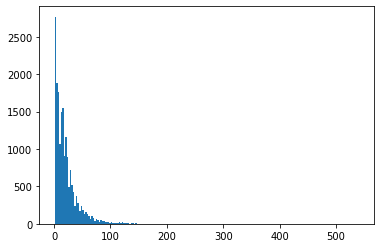

In [40]:
plt.hist(i2n.values,bins=200)
#plt.xlim(0,200)

This is a markdown cell. Replace this cell with your insights and reasons for (9).
- a large number of people buy few things in one transaction.
- less people buy lots of unique items in one transaction.

#### Section 4 - Mining Association Rules

<span style="color:blue"> 1) Will we complete the counting before the sun burns out (the sun has another $ 5 \times 10^9 < 2^{33} $ years to burn)? </span>

This is a markdown cell. Replace this cell with your answer and reasons for (1).
- $3^{3665} > 2^{33}*2^{36}*2^{25} > 2^{33}*2^{36}*365*24*60*60$
- Therefore, we cannot finish the counting before the sun burns out

<span style="color:blue"> 2) Run efficient-apriori in python with min_support=0.025, min_confidence=0.2, max_length=4. Write down the number of rules found and the rule with the highest lift. </span>

In [42]:
df=pd.read_csv("record.csv")
df=df[(df.Quantity>=0) & (df.CustomerID.notnull())]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0


In [43]:
def f(row):return [row["StockCode"]]
df["StockCode"] = df.apply(f, axis=1)
transactionsInit=df.groupby(["InvoiceNo"])['StockCode'].sum().values.tolist()

In [44]:
transactions=[]
for i in transactionsInit:transactions.append(list(set(i)))

In [46]:
itemsets, rules = apriori(transactions, min_support=0.025,  min_confidence=0.2,max_length=4)
rules=sorted(rules,key=lambda rule:rule.lift,reverse=True)

number of rules 22
highest lift [{22699} -> {22697}, {22697} -> {22699}]


In [47]:
print('number of rules',len(rules))
print("highest lift",rules[0],rules[1])

number of rules 22
highest lift {22699} -> {22697} (conf: 0.691, supp: 0.029, lift: 18.534, conv: 3.115) {22697} -> {22699} (conf: 0.783, supp: 0.029, lift: 18.534, conv: 4.412)


- the number of rules found:22
- the rule with the highest lift 
    - {22699} -> {22697} (conf: 0.691, supp: 0.029, lift: 18.534, conv: 3.115)
    - {22697} -> {22699} (conf: 0.783, supp: 0.029, lift: 18.534, conv: 4.412)

<span style="color:blue"> 3) Run efficient-apriori in python with min_support=0.02, min_confidence=0.2, max_length=4. Write down the number of rules found and the rule with the highest lift. </span>

In [48]:
min_support,min_confidence=0.02,0.2
itemsets, rules = apriori(transactions, min_support=0.02,  min_confidence=0.2,max_length=4)
rules=sorted(rules,key=lambda rule:rule.lift,reverse=True)

In [49]:
print('number of rules',len(rules))
print("highest lift",rules[0],rules[1])

number of rules 88
highest lift {22697, 22699} -> {22698} (conf: 0.721, supp: 0.021, lift: 24.033, conv: 3.475) {22698} -> {22697, 22699} (conf: 0.701, supp: 0.021, lift: 24.033, conv: 3.252)


- the number of rules found:88
- the rule with the highest lift:
    - {22697, 22699} -> {22698} (conf: 0.721, supp: 0.021, lift: 24.033, conv: 3.475)
    - {22698} -> {22697, 22699} (conf: 0.721, supp: 0.021, lift: 24.033, conv: 3.475)

<span style="color:blue"> 4) Run efficient-apriori in python with min_support=0.025, min_confidence=0.4, max_length=4. Write down the number of rules found and the rule with the highest lift. </span>

In [53]:
itemsets, rules = apriori(transactions, min_support=0.025,  min_confidence=0.4,max_length=4)
rules=sorted(rules,key=lambda rule:rule.lift,reverse=True)
print('number of rules',len(rules))
print("highest lift",rules[0])

number of rules 19
highest lift {22699} -> {22697} (conf: 0.691, supp: 0.029, lift: 18.534, conv: 3.115)


- the number of rules found:19
- the rule with the highest lift:
    - {22699} -> {22697} (conf: 0.691, supp: 0.029, lift: 18.534, conv: 3.115)
    - {22697} -> {22699} (conf: 0.691, supp: 0.029, lift: 18.534, conv: 3.115)

<span style="color:blue"> 5) Compare the first two cases. How do they differ in the time taken for the algorithm to run, the number of rules found, and the lift of the highest lift rule? Briefly explain why each of these findings occur, based on the effects of changing min_support.  </span>

# case 1 vs case 2
- time difference: 19s < 41.3s
    - Because the min_support in the case 2 is less than case one, less itemsets are generated in the Frequent Itemset Generation phase in the case 1. 
    - Rule Generation phase is very fast since the algorithm can use information provided in the phase one. There are no much differences in Rule Generation phase.
- the number of rules: 22 < 88
    - There are more candidate itemsets for Rule Generation phase and the same limitation for the Rule Generation phase, therefore, we have more rules generated.
- the lift of the highest lift rule: {22699} -> {22697}:18.534 < {22697, 22699} -> {22698}:24.033
    - If we set smaller min_support, we will have more frequent itemsets. If we have itemsets with samller support, we have chance to get bigger lift. 
    - $supp(A\cup B) \div (supp(A) \times supp(B)) = (n(A\cup B) \times n(all)) \div (n(A) \times n(B))$. If we let $n(A)=n(B)=n(A\cup B)$, the lift value$=n(all) \div n(A)= 1 \div supp(A)$, which means less $n(A)$ have larger lift values.

<span style="color:blue"> 6) Compare the first and third case. How do they differ in the number of rules found? Briefly explain why this finding occurs, based on the effects of changing min_confidence. </span>

# case 1 vs case 3
- the number of rules: 22 > 19
    - There are the same candidate itemsets generated in Frequent Itemset Generation phase. However, the limitation for min_confidence is different. The larger min_confidence generate less rules.   

<span style="color:blue"> 7) Report the descriptions of the items associated with the highest lift rule you found in the three queries (you may use any method to do this). Does the rule make sense? </span>

In [54]:
df=pd.read_csv("record.csv")
df=df[(df.Quantity>=0) & (df.CustomerID.notnull())]
print(df[df.StockCode=='22699']['Description'].iloc[0],'',df[df.StockCode=='22697']['Description'].iloc[0])

ROSES REGENCY TEACUP AND SAUCER   GREEN REGENCY TEACUP AND SAUCER


In [55]:
print(df[df.StockCode=='22697']['Description'].iloc[0],
      df[df.StockCode=='22699']['Description'].iloc[0],
      df[df.StockCode=='22698']['Description'].iloc[0])

GREEN REGENCY TEACUP AND SAUCER ROSES REGENCY TEACUP AND SAUCER  PINK REGENCY TEACUP AND SAUCER


In [56]:
print(df[df.StockCode=='22699']['Description'].iloc[0],
      df[df.StockCode=='22697']['Description'].iloc[0])

ROSES REGENCY TEACUP AND SAUCER  GREEN REGENCY TEACUP AND SAUCER


- case 1: ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER
- case 2: GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER
- case 3: ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER
- Yes, make sense. Customers perfer to buy TEACUP with two or three different colors together.